## PUCRJ MVP Sprint 3 - Qualidade de Software, Segurança e Sistemas Inteligentes
## Giovanny Pimenta Monteiro

Este notebook apresenta uma análise abrangente de variáveis que influenciam o sono e os hábitos diários, oferecendo uma visão profunda sobre como diferentes fatores podem impactar o bem-estar geral. Os dados analisados incluem uma ampla gama de informações demográficas e fisiológicas, como o gênero e a idade dos participantes, a duração e a qualidade do sono reportada, além de detalhes específicos sobre os níveis diários de atividade física e estresse. Também são levados em consideração fatores relacionados à saúde, como a categoria de IMC, que pode influenciar o metabolismo e a qualidade do sono, bem como medições vitais, incluindo pressão arterial, frequência cardíaca e a contagem de passos diários, que fornecem um quadro mais completo do estilo de vida dos indivíduos. Por fim, o estudo explora a presença ou ausência de distúrbios do sono, oferecendo uma análise detalhada sobre possíveis correlações entre esses distúrbios e os hábitos diários observados, permitindo um entendimento mais profundo sobre a relação entre sono, saúde e hábitos de vida.

In [2]:
# Suprime a exibição de avisos desnecessários para manter o ambiente limpo durante a execução
import warnings
warnings.filterwarnings("ignore")

# Importação de bibliotecas essenciais para manipulação de dados, pré-processamento, modelagem e serialização
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from pickle import dump
from pickle import load
import joblib


## Carregamento do Dataset de Saúde e Estilo de Vida

In [3]:
# Definindo a URL de onde o dataset será carregado
url_dataset = "https://raw.githubusercontent.com/gyomonteiro/MVP_PUCRJ_SPRINT_III/refs/heads/main/archive/sleep_health_and_lifestyle_treated.csv"

# Carregamento do dataset a partir da URL especificada utilizando pandas
dados_saude = pd.read_csv(url_dataset, delimiter=',')

# Exibindo as primeiras linhas do dataset para verificar a correta leitura e estrutura dos dados
dados_saude.head()


,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27.0,6.1,6,42,6,2.0,126.83,77,4200,0
1,2,1,28.0,6.2,6,60,8,1.0,125.80,75,10000,0
2,3,1,28.0,6.2,6,60,8,1.0,125.80,75,10000,0
3,4,1,28.0,5.9,4,30,8,3.0,140.90,85,3000,1
4,5,1,28.0,5.9,4,30,8,3.0,140.90,85,3000,1


## Separação em Conjunto de Treino e Teste com Holdout

In [20]:
# Configurações iniciais
tamanho_teste = 0.20  # Proporção do conjunto de teste
semente_aleatoria = 7  # Semente para geração aleatória

# Extração das características e do alvo
caracteristicas = dados_saude.values[:, 1:11]  # Seleção de colunas de características
alvo = dados_saude.values[:, 11]  # Seleção da coluna alvo

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(caracteristicas, alvo,
                                                        test_size=tamanho_teste,
                                                        shuffle=True,
                                                        random_state=semente_aleatoria,
                                                        stratify=alvo)  # Holdout com estratificação

# Parâmetros de partição da validação cruzada
criterio_scoring = 'accuracy'  # Critério de pontuação: acurácia
num_particoes = 10  # Número de partições para a validação cruzada

# Configuração do k-fold estratificado
kfold = StratifiedKFold(n_splits=num_particoes,
                        shuffle=True,
                        random_state=semente_aleatoria)  # Validação cruzada com estratificação


### Criação e Avaliação de Modelos de Classificação

KNN: Média = 0.886207, Desvio Padrão = 0.073472
Árvore de Decisão: Média = 0.929885, Desvio Padrão = 0.062205
Naive Bayes: Média = 0.438276, Desvio Padrão = 0.059609
SVM: Média = 0.595287, Desvio Padrão = 0.027832


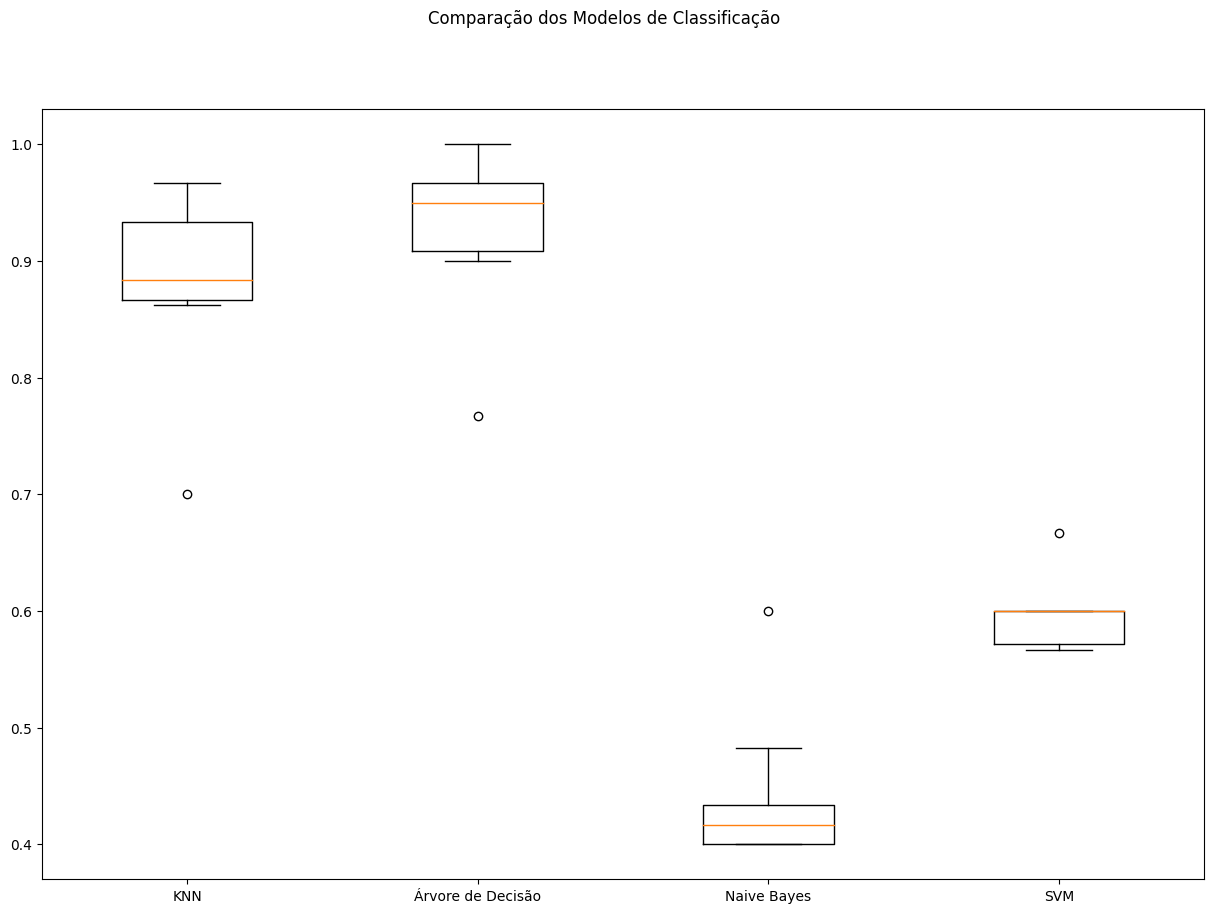

In [21]:
# Definindo uma semente global para garantir a reprodutibilidade dos resultados
np.random.seed(7)

# Lista para armazenar as configurações dos modelos de classificação
modelos_classificacao = []

# Adicionando modelos de classificação comuns à lista
modelos_classificacao.append(('KNN', KNeighborsClassifier()))
modelos_classificacao.append(('Árvore de Decisão', DecisionTreeClassifier()))
modelos_classificacao.append(('Naive Bayes', GaussianNB()))
modelos_classificacao.append(('SVM', SVC()))

# Listas para armazenar os resultados da validação cruzada
resultados_cv = []
nomes_modelos = []

# Avaliação dos modelos usando validação cruzada
for nome, modelo in modelos_classificacao:
    cv_resultados = cross_val_score(modelo, X_treino, y_treino, cv=kfold, scoring=criterio_scoring)
    resultados_cv.append(cv_resultados)
    nomes_modelos.append(nome)
    mensagem = "%s: Média = %f, Desvio Padrão = %f" % (nome, cv_resultados.mean(), cv_resultados.std())
    print(mensagem)

# Boxplot para comparação dos modelos de classificação
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação dos Modelos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados_cv)
ax.set_xticklabels(nomes_modelos)
plt.show()


### Criação e Avaliação de Modelos de Classificação Utilizando Dados em Diferentes Formatos

KNN-Original: Média = 0.886, Desvio Padrão = 0.073
CART-Original: Média = 0.930, Desvio Padrão = 0.062
NB-Original: Média = 0.438, Desvio Padrão = 0.060
SVM-Original: Média = 0.595, Desvio Padrão = 0.028
KNN-Padronizado: Média = 0.930, Desvio Padrão = 0.066
CART-Padronizado: Média = 0.930, Desvio Padrão = 0.062
NB-Padronizado: Média = 0.438, Desvio Padrão = 0.060
SVM-Padronizado: Média = 0.930, Desvio Padrão = 0.066
KNN-Normalizado: Média = 0.923, Desvio Padrão = 0.068
CART-Normalizado: Média = 0.930, Desvio Padrão = 0.062
NB-Normalizado: Média = 0.438, Desvio Padrão = 0.060
SVM-Normalizado: Média = 0.926, Desvio Padrão = 0.063


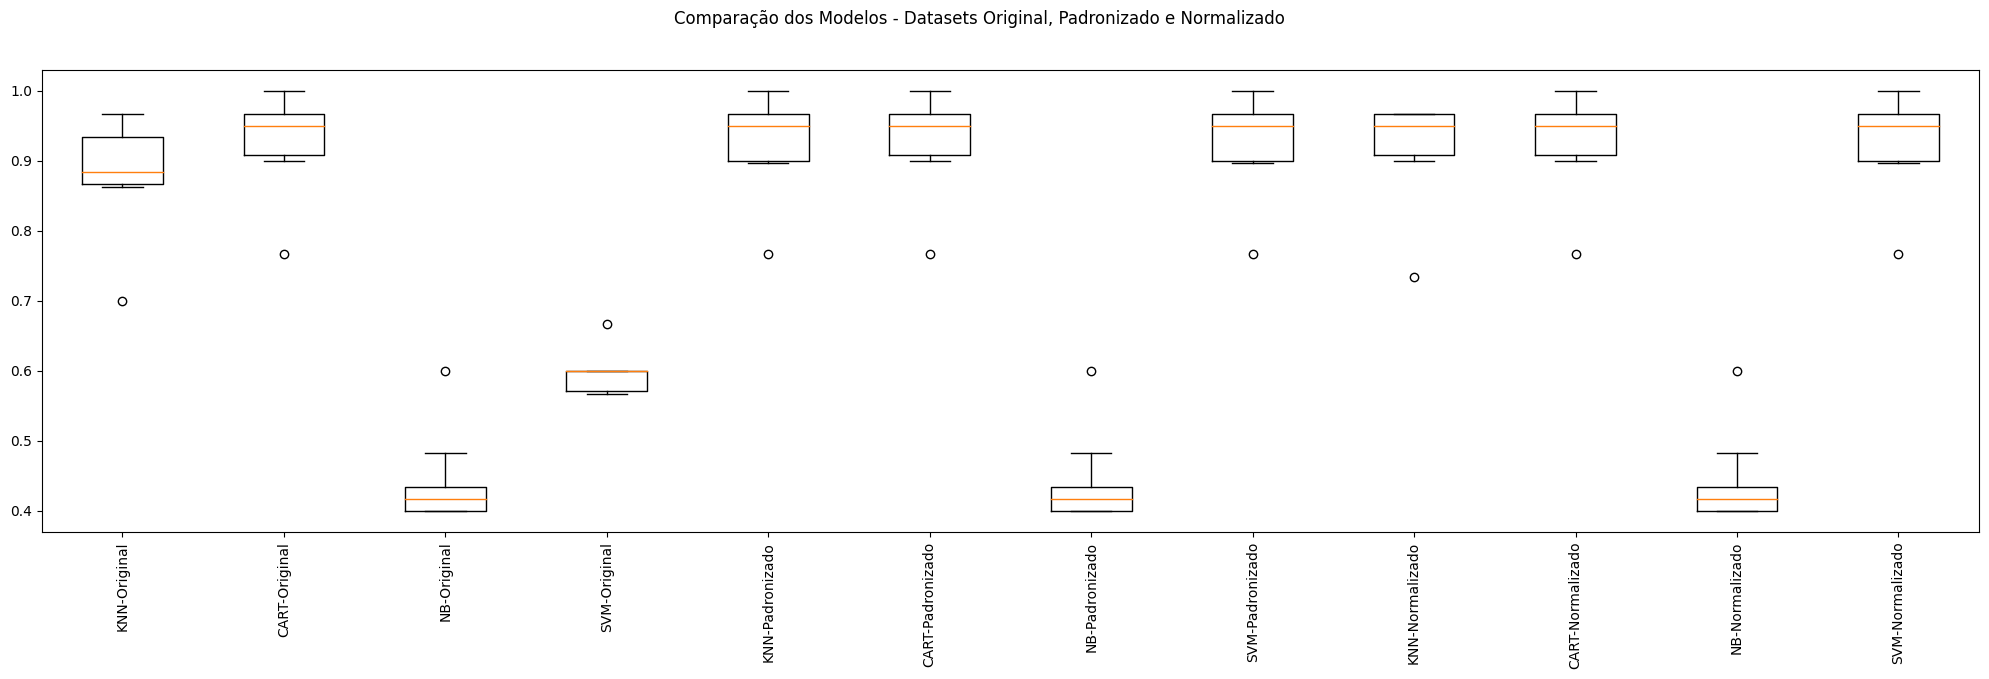

In [22]:
# Definindo uma semente global para garantir a consistência dos resultados
np.random.seed(7)

# Listas para armazenar os pipelines e os resultados de cada configuração
pipelines = []
resultados_modelos = []
nomes_modelos = []

# Definição dos modelos de classificação a serem utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Definição das transformações para pré-processamento dos dados
scaler_padrao = ('StandardScaler', StandardScaler())
scaler_minmax = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines para avaliação em diferentes versões do dataset

# Pipelines para o dataset original
pipelines.append(('KNN-Original', Pipeline([knn])))
pipelines.append(('CART-Original', Pipeline([cart])))
pipelines.append(('NB-Original', Pipeline([naive_bayes])))
pipelines.append(('SVM-Original', Pipeline([svm])))

# Pipelines para o dataset padronizado
pipelines.append(('KNN-Padronizado', Pipeline([scaler_padrao, knn])))
pipelines.append(('CART-Padronizado', Pipeline([scaler_padrao, cart])))
pipelines.append(('NB-Padronizado', Pipeline([scaler_padrao, naive_bayes])))
pipelines.append(('SVM-Padronizado', Pipeline([scaler_padrao, svm])))

# Pipelines para o dataset normalizado
pipelines.append(('KNN-Normalizado', Pipeline([scaler_minmax, knn])))
pipelines.append(('CART-Normalizado', Pipeline([scaler_minmax, cart])))
pipelines.append(('NB-Normalizado', Pipeline([scaler_minmax, naive_bayes])))
pipelines.append(('SVM-Normalizado', Pipeline([scaler_minmax, svm])))

# Execução dos pipelines e coleta de resultados
for nome, modelo in pipelines:
    resultados_cv = cross_val_score(modelo, X_treino, y_treino, cv=kfold, scoring=criterio_scoring)
    resultados_modelos.append(resultados_cv)
    nomes_modelos.append(nome)
    mensagem = "%s: Média = %.3f, Desvio Padrão = %.3f" % (nome, resultados_cv.mean(), resultados_cv.std())
    print(mensagem)

# Boxplot para comparação visual dos resultados
figura = plt.figure(figsize=(25, 6))
figura.suptitle('Comparação dos Modelos - Datasets Original, Padronizado e Normalizado')
eixo = figura.add_subplot(111)
plt.boxplot(resultados_modelos)
eixo.set_xticklabels(nomes_modelos, rotation=90)
plt.show()


### Otimização dos Hiperparâmetros do KNN

KNN-Padronizado: Melhor: 0.930 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}


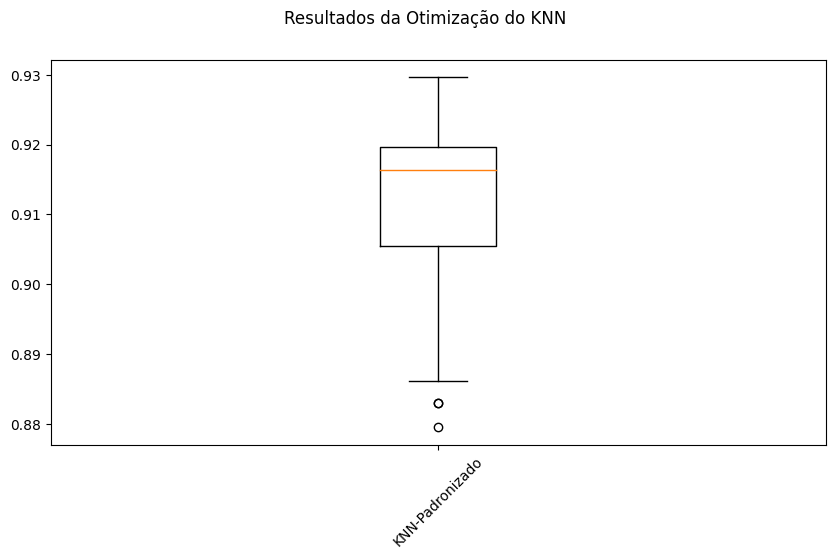

In [30]:
# Tuning do KNN

# Definindo uma semente global para garantir a consistência dos resultados
np.random.seed(7)

# Lista para armazenar os pipelines e os GridSearchCV correspondentes
pipelines_knn = []
grids_knn = []

# Componentes do pipeline para KNN
knn = ('KNN', KNeighborsClassifier())
scaler_padrao = ('StandardScaler', StandardScaler())

# Montagem do pipeline
pipelines_knn.append(('KNN-Padronizado', Pipeline([scaler_padrao, knn])))

# Definição da grade de parâmetros para a otimização
param_grid_knn = {
    'KNN__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'KNN__metric': ['euclidean', 'manhattan', 'minkowski'],
    'KNN__weights': ['uniform', 'distance']
}

# Preparação e execução do GridSearchCV
for nome, modelo in pipelines_knn:
    grid_knn = GridSearchCV(estimator=modelo, param_grid=param_grid_knn, scoring=criterio_scoring, cv=kfold)
    grid_knn.fit(X_treino, y_treino)
    grids_knn.append((nome, grid_knn))
    # Impressão da melhor configuração encontrada
    print(f"{nome}: Melhor: {grid_knn.best_score_:.3f} usando {grid_knn.best_params_}")

# Visualização gráfica dos resultados
figura = plt.figure(figsize=(10, 5))
figura.suptitle('Resultados da Otimização do KNN')
eixo = figura.add_subplot(111)
# Agregar resultados para cada grid em uma lista para plotagem
resultados_knn = [grid_knn.cv_results_['mean_test_score'] for nome, grid_knn in grids_knn]
plt.boxplot(resultados_knn)
eixo.set_xticklabels([nome for nome, _ in grids_knn], rotation=45)
plt.show()


## Finalização do Modelo

In [36]:
# Atualização do modelo KNN com os melhores hiperparâmetros encontrados
melhores_parametros_knn = grid_knn.best_params_
modelo_knn_otimizado = KNeighborsClassifier(
    n_neighbors=melhores_parametros_knn['KNN__n_neighbors'],
    metric=melhores_parametros_knn['KNN__metric'],
    weights=melhores_parametros_knn['KNN__weights']
)

# Ajuste do StandardScaler com o conjunto de treino
scaler = StandardScaler().fit(X_treino)
# Aplicação da padronização no conjunto de treino
X_treino_rescaled = scaler.transform(X_treino)

# Treinamento do modelo otimizado com os dados padronizados de treino
modelo_knn_otimizado.fit(X_treino_rescaled, y_treino)

# Estimativa da acurácia no conjunto de teste
X_teste_rescaled = scaler.transform(X_teste)
predicoes = modelo_knn_otimizado.predict(X_teste_rescaled)
print("Acurácia no conjunto de teste com KNN otimizado:", accuracy_score(y_teste, predicoes))


Acurácia no conjunto de teste com KNN otimizado: 0.9466666666666667


In [32]:
# Preparação do modelo com TODO o dataset
scaler_total = StandardScaler().fit(caracteristicas)
caracteristicas_rescaled = scaler_total.transform(caracteristicas)
modelo_knn_otimizado.fit(caracteristicas_rescaled, alvo)

# Salvando o modelo otimizado e o scaler
joblib.dump(modelo_knn_otimizado, 'sleep_health_knn.joblib')
joblib.dump(scaler_total, 'scaler_knn.joblib')

['scaler_knn.joblib']

### Salvando o modelo usando a biblioteca Picke

In [26]:
# Definição do nome do arquivo onde o modelo será salvo
artifact_pkl_filename = 'sleep_health.pkl'

# Caminho local para salvar o arquivo
local_path = artifact_pkl_filename

# Salvando o modelo treinado no formato Pickle
with open(local_path, 'wb') as model_file:
    pickle.dump(modelo, model_file)

### Salvando o mesmo modelo usando a biblioteca Joblib

In [27]:
# Definição do nome do arquivo onde o modelo será salvo usando Joblib
joblib_filename = 'sleep_health.joblib'

# Caminho local para salvar o arquivo
local_path = joblib_filename

# Salvando o modelo treinado usando Joblib
joblib.dump(modelo, local_path)

# Salvando o objeto de escala em um arquivo separado
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

## Simulando a aplicação do modelo em dados não vistos

In [45]:
# Novos dados - ainda não classificados
data = {
    'person_ID': [1, 2, 3, 4],
    'gender': [1, 0, 1, 0],
    'age': [27, 43, 89, 20],
    'sleep_duration': [6.1, 7, 9, 5],
    'quality_sleep': [8, 7, 10, 7],
    'activity_level': [42, 35, 75, 20],
    'stress_level': [6, 8, 3, 70],
    'bmi_category': [3, 2, 1, 2],
    'blood_pressure': [126.83, 132.87, 120.80, 130],
    'heart_rate': [77, 75, 69, 70],
    'daily_steps': [10000, 5000, 9500, 1000]
}

# Convertendo os dados em um DataFrame para manipulação
atributos = ['person_ID', 'gender', 'age', 'sleep_duration', 'quality_sleep', 'activity_level',
             'stress_level', 'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps']
entrada = pd.DataFrame(data, columns=atributos)

# Convertendo todos os dados em floats para consistência
array_entrada = entrada.values[:, 1:11].astype(float)

# Padronização dos dados de entrada usando o scaler treinado previamente
X_entrada_rescaled = scaler_total.transform(array_entrada)

In [46]:
# Previsão de classes para os dados de entrada
saidas = modelo_knn_otimizado.predict(X_entrada_rescaled)
print("Predições dos novos dados com KNN otimizado:", saidas)

Predições dos novos dados com KNN otimizado: [0. 1. 0. 1.]


**Conclusão da Análise**

Na avaliação do conjunto de dados selecionado, constatou-se que o algoritmo KNN com dados padronizados (KNN-Padronizado) alcançou a melhor performance, registrando uma precisão média de 0.930 com um desvio padrão de 0.066. Após a otimização dos hiperparâmetros através do GridSearchCV, o modelo KNN apresentou uma acurácia de 0.947 no conjunto de teste utilizando os parâmetros n_neighbors=3, metric='euclidean' e weights='uniform'.

Ao analisar os dados, foi possível discernir perfis com maior propensão a distúrbios do sono. Conclui-se que indivíduos mais jovens, fisicamente ativos e com melhor estado de saúde geral tendem a apresentar menores incidências de problemas relacionados ao sono.